# Exploratory Data Analysis (EDA)

In this notebook, we explore the dataset’s key columns containing detailed flight information, and perform preliminary analysis to understand underlying patterns and data quality. As part of EDA, we examine distributions, detect anomalies or missing values, and analyze correlations between variables. 

We also begin extracting informative features from temporal columns - such as identifying the time of year, time of day, and other derived indicators - to support the downstream flight prediction models.

**Reading the .csv file**

We begin by reading the .cvs file into a Pandas DataFrame and displays the first 5 rows.

In [1]:
import pandas as pd

# Read the CSV file with a specified encoding
df = pd.read_csv("airline_2m.csv", encoding="ISO-8859-1", low_memory=False)

# Display the first 5 rows
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Key Metadata**

We explore the dataset by retrieving key metadata:
- We list all column names in the dataset. This helps us understand the structure of the data.

- We get an overview of the dataset, including column names, data types, and non-null value counts This helps identify missing data and memory usage.

- We generate summary statistics for numerical columns, including mean, standard deviation, min, max, and quartiles. This helps in understanding the distribution of the data.

In [3]:
df.columns.tolist()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 109 entries, Year to Div5TailNum
dtypes: float64(72), int64(18), object(19)
memory usage: 1.6+ GB


,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.004314e+03,2.501267e+00,6.500761e+00,1.572202e+01,3.937445e+00,1.992450e+04,1.719375e+03,1.271899e+04,1.271901e+06,3.173373e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.228930e+00,1.118022e+00,3.443460e+00,8.778412e+00,1.990369e+00,3.665827e+02,1.659726e+03,1.534529e+03,1.534527e+05,1.302432e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.987000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.938600e+04,1.000000e+00,1.013500e+04,1.013501e+06,3.007000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.997000e+03,1.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,1.970400e+04,5.220000e+02,1.129200e+04,1.129202e+06,3.064700e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.005000e+03,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,1.170000e+03,1.289200e+04,1.289201e+06,3.145300e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.012000e+03,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,2.035500e+04,2.211000e+03,1.405700e+04,1.405702e+06,3.257500e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.020000e+03,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.117100e+04,9.794000e+03,1.686900e+04,1.686901e+06,3.610100e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Viewing Columns Titles**

We now view all of the columns titles in the dataset.

In [3]:
for col in df.columns:
    print(col)

Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime
Div1LongestGTime
Div1W

**Preview All Columns**

We display the first five rows of the dataset, showing all columns, while ensuring all columns are visible in the output and  we prevent line breaks for better readability.

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  

# Display the first 5 rows of the dataset
print(df.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  1998        1      1           2          5  1998-01-02                NW   
1  2009        2      5          28          4  2009-05-28                FL   
2  2013        2      6          29          6  2013-06-29                MQ   
3  2010        3      8          31          2  2010-08-31                DL   
4  2006        1      1          15          7  2006-01-15                US   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  \
0                     19386                          NW      N297US   
1                     20437                          FL      N946AT   
2                     20398                          MQ      N665MQ   
3                     19790                          DL      N6705Y   
4                     20355                          US      N504AU   

   Flight_Number_Reporting_Airline  OriginAirportID  OriginAirportSeqID  \
0                

**Null Values**

We check for which columns have null values and get the count of null values.

In [8]:
# Adjust pandas settings to display all columns without truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent line wrapping
pd.set_option('display.max_rows', None)  # Allow displaying all rows (if needed)

# Check for null values in each column and filter columns with null counts greater than 0
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]

# Show the columns with null values and their counts
print("Columns with Null Values and Their Counts:")
print(null_columns)

Columns with Null Values and Their Counts:
Tail_Number              391763
OriginState                 646
OriginStateFips             646
OriginStateName             646
DestState                   594
DestStateFips               594
DestStateName               594
DepTime                   36005
DepDelay                  36068
DepDelayMinutes           36068
DepDel15                  36068
DepartureDelayGroups      36068
TaxiOut                  415642
WheelsOff                415677
WheelsOn                 417958
TaxiIn                   417847
ArrTime                   39551
ArrDelay                  41078
ArrDelayMinutes           41078
ArrDel15                  41078
ArrivalDelayGroups        41078
CancellationCode        1979780
CRSElapsedTime              281
ActualElapsedTime         41052
AirTime                  419349
CarrierDelay            1778197
WeatherDelay            1778197
NASDelay                1778197
SecurityDelay           1778197
LateAircraftDelay       17781

**Shape of Dataset**

We produce the shape of the dataset (the number or rows and columns).

In [9]:
# Display the number of rows and columns in the dataset
print(f"\nShape of the dataset: {df.shape}")


Shape of the dataset: (2000000, 109)


**Data Types**

We explore the data type of each column in the dataset.

In [10]:
# Show data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
DOT_ID_Reporting_Airline             int64
IATA_CODE_Reporting_Airline         object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
OriginAirportSeqID                   int64
OriginCityMarketID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
OriginStateFips                    float64
OriginStateName                     object
OriginWac                            int64
DestAirportID                        int64
DestAirportSeqID                     int64
DestCityMarketID          

**Duplicate Rows**

We check if there are any duplicate rows in the dataset.

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## **Data Visualization**

In this section, we create and analyze visualizations to better understand the patterns and trends in the data.

---------------------------------------------------------------------------------------------------------------------

## **Distribution of Arrival Delay per Minute of Air Time**

X-axis: Arrival Delay / AirTime (Minutes)

Y-axis: Frequency of Flights

This will describe the graph showing how the arrival delay per minute of air time is distributed across the dataset, including how frequently different values occur.

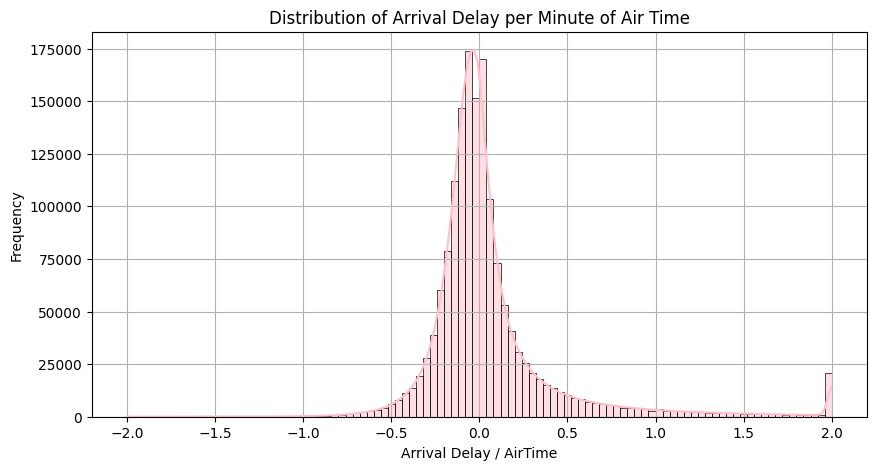

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to avoid division by zero and remove extreme outliers
df_ratio = df[(df['AirTime'] > 0) & (df['ArrDelay'].notna())].copy()
df_ratio['DelayPerMinute'] = df_ratio['ArrDelay'] / df_ratio['AirTime']

# Optional: Clip extreme ratios to reduce skew in visualization
df_ratio['DelayPerMinute'] = df_ratio['DelayPerMinute'].clip(-2, 2)

# Plot the distribution of the delay per minute of air time with a pink-orange color palette
plt.figure(figsize=(10, 5))
sns.histplot(df_ratio['DelayPerMinute'], bins=100, kde=True, color='pink', line_kws={'color': 'blue'})
plt.title('Distribution of Arrival Delay per Minute of Air Time')
plt.xlabel('Arrival Delay / AirTime')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

To investigate the negative arrival times and visualize the distribution, we can filter out the flights with negative arrival delays and focus on positive delays (i.e., delayed flights). Additionally, we'll count how many flights had negative arrival delays and plot the distribution excluding them.

In [27]:
# Check for negative values in DepDelay and ArrDelay
negative_dep_delays = df[df['DepDelay'] < 0].shape[0]
negative_arr_delays = df[df['ArrDelay'] < 0].shape[0]

print(f"Number of negative departure delays: {negative_dep_delays}")
print(f"Number of negative arrival delays: {negative_arr_delays}")

Number of negative departure delays: 874669
Number of negative arrival delays: 1030110


The large number of negative departure and arrival delays (874,669 and 1,030,110, respectively) suggests that some flights departed or arrived earlier than expected. 

By excluding the negative arrival delays, we can focus only on the delayed flights and get a clearer picture of how delays are distributed. This will allow us to analyze the "Delay per Minute" more accurately, focusing on the subset of flights that experienced delays, which is more relevant for understanding delay patterns.

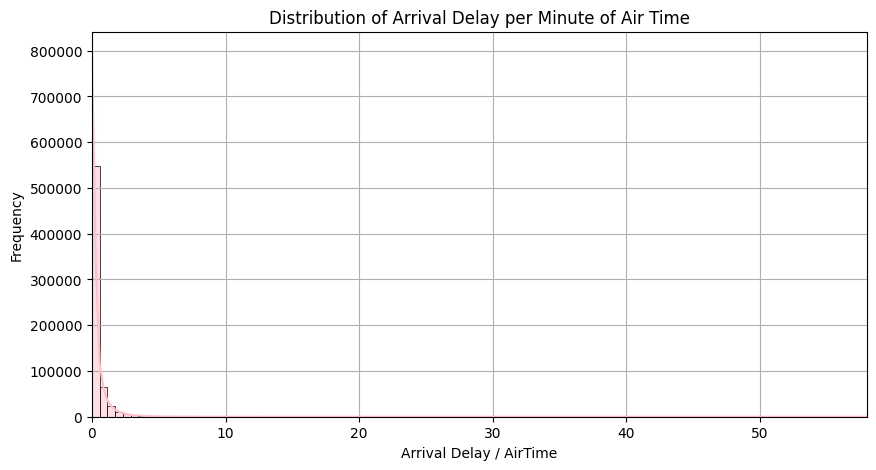

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to avoid division by zero and remove extreme outliers, also remove zero and negative values
df_ratio = df[(df['AirTime'] > 0) & (df['ArrDelay'].notna())].copy()
df_ratio['DelayPerMinute'] = df_ratio['ArrDelay'] / df_ratio['AirTime']

# Remove zero and negative values (only keeping delayed flights)
df_ratio = df_ratio[df_ratio['DelayPerMinute'] > 0]

# Plot the distribution of the delay per minute of air time with a pink-orange color palette
plt.figure(figsize=(10, 5))
sns.histplot(df_ratio['DelayPerMinute'], bins=100, kde=True, color='pink', line_kws={'color': 'blue'})

# Adjust the x-axis to start from 0
plt.xlim(0, df_ratio['DelayPerMinute'].max())  # Ensure the x-axis starts at 0

plt.title('Distribution of Arrival Delay per Minute of Air Time')
plt.xlabel('Arrival Delay / AirTime')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# Calculate skewness without clipping
skewness = df_ratio['DelayPerMinute'].skew()
print(f"Skewness without clipping: {skewness}")

Skewness without clipping: 2.617475495799543


The skewness value of 2.62 indicates that the Delay per Minute distribution is right-skewed (positively skewed). This means there is a long tail extending to the right, indicating that there are a few instances where the delays per minute are much higher than the rest of the data.

This kind of skewness suggests that most flights may have relatively short delays compared to the few with much larger delays. The insight gained from this is that while most flights might experience minor delays, there are a small number of flights with significant delays, which could have a disproportionately large impact on operational efficiency and passenger satisfaction.

From a predictive modeling perspective, this suggests that forecasting models should account for these larger delays, as they could skew predictions if not properly managed. 

Additionally, airlines or other stakeholders might want to focus more on the factors that cause these larger delays to improve overall on-time performance. 

For further analysis, it could be helpful to investigate the characteristics of these outliers, such as the routes or times of day when they occur most frequently, in order to develop targeted strategies for reducing extreme delays.

---------------------------------------------------------------------------------------------------------------------

## **Arrival Delay vs Departure Delay**

X-axis: Departure Delay (minutes) — This axis represents the delay experienced during the departure of a flight, in minutes.

Y-axis: Arrival Delay (minutes) — This axis represents the delay encountered upon the flight's arrival, also in minutes.

This scatter plot visualizes the relationship between departure delays and arrival delays. Each point represents a flight with both positive departure and arrival delays, and the scatter plot helps you see how these two variables are related. The pink regression line provides an indication of the trend or correlation between the two delays, giving insights into whether flights with larger departure delays tend to experience larger arrival delays.

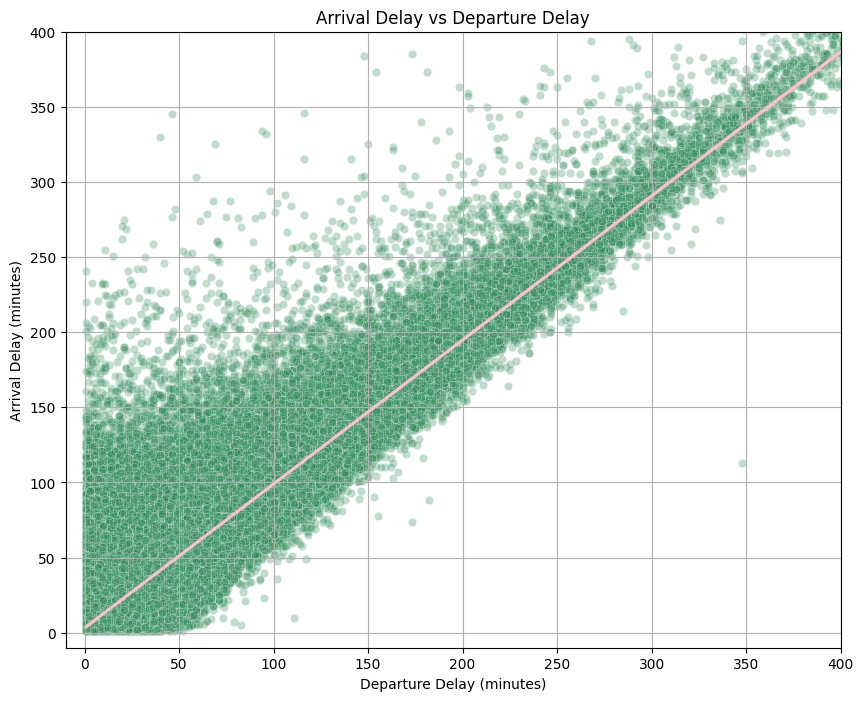

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to only include flights with both positive departure and arrival delays
data = df[(df['DepDelay'] > 0) & (df['ArrDelay'] > 0)][['DepDelay', 'ArrDelay']]

plt.figure(figsize=(10, 8))

# Scatter plot with seafoam green color
sns.scatterplot(data=data, x='DepDelay', y='ArrDelay', alpha=0.3, color='seagreen')

# Optional: Add regression line in pink
sns.regplot(data=data, x='DepDelay', y='ArrDelay', scatter=False, color='pink')

plt.title('Arrival Delay vs Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.xlim(-10, 400)
plt.ylim(-10, 400)
plt.grid(True)
plt.show()

The scatter plot and regression line illustrate a clear positive correlation between departure delays and arrival delays. 

This means that flights with longer departure delays are more likely to experience longer arrival delays. 

The positive slope of the regression line emphasizes this relationship, suggesting that departure delays are a good predictor for arrival delays. However, some outliers exist where arrival delays are either much higher or lower than expected based on the departure delay. These anomalies may be influenced by external factors like weather, air traffic, or operational issues. 

The practical implication for airlines and airports is that reducing departure delays could help prevent a cascade effect that leads to longer arrival delays, thus improving flight scheduling and reducing passenger disruptions. Flight operations teams could use this insight to refine delay management strategies and improve predictive models, ultimately enhancing on-time performance and operational efficiency.

---------------------------------------------------------------------------------------------------------------------

## **Number of Flights by Origin**

X-axis: Airport

Y-axis: Number of Flights

This bar plot represents the distribution of flights by origin airport, showing how many flights originate from each airport. The bars are colored by airport to help differentiate between them, and the x-axis labels (airport names) are rotated for better readability.


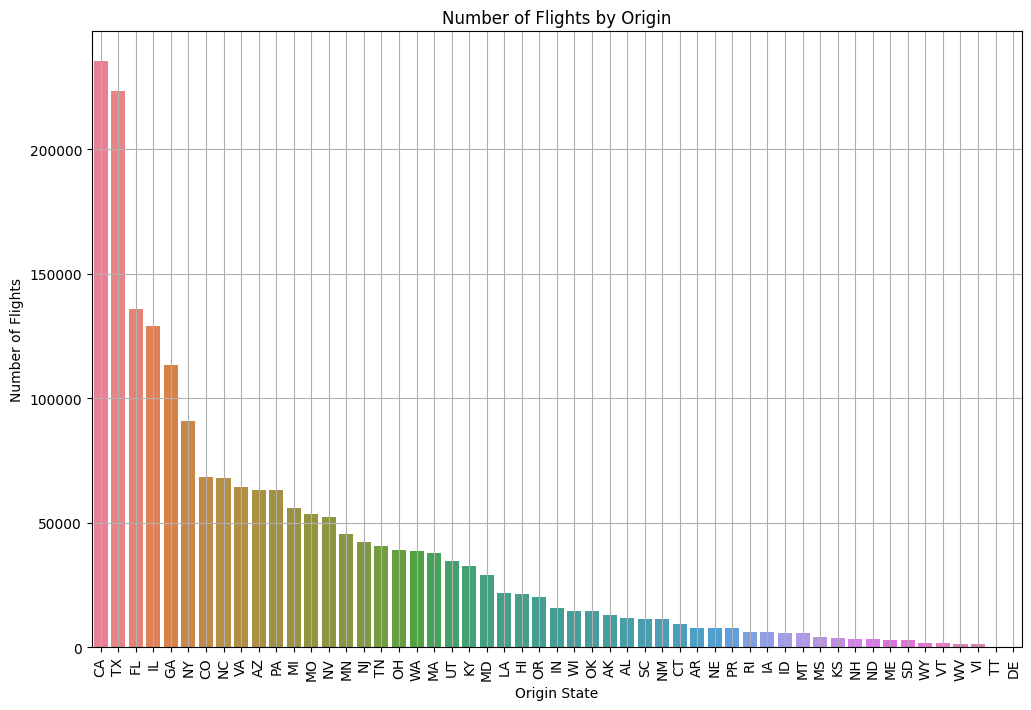

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

origin_counts = df['OriginState'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=origin_counts.index, y=origin_counts.values, hue=origin_counts.index)
plt.title('Number of Flights by Origin')
plt.xlabel('Origin State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The bar chart highlights the number of flights by origin state, showing that California (CA) and Texas (TX) have the highest number of flights, which could correlate with higher delays due to the increased volume of flights. 

States like Florida (FL), Illinois (IL), and Georgia (GA) follow with moderate numbers of flights, which may still contribute to significant delays but on a smaller scale compared to CA and TX. 

On the lower end, states such as Delaware (DE), Trinidad and Tobago (TT), and the U.S. Virgin Islands (VI) show fewer flights, possibly indicating fewer delays, as these regions handle less air traffic.

This insight is important for our delay analysis, as airports in states with high flight numbers may experience higher congestion, leading to increased departure and arrival delays. 

Focusing on reducing delays in high-traffic states like CA and TX could be a key area for operational improvement. Additionally, airports in smaller regions, with fewer flights, may experience more manageable delays, which could provide opportunities for optimizing schedules and improving overall on-time performance. 

Understanding these patterns will help refine predictive models for delay management and resource allocation within the airline industry.

---------------------------------------------------------------------------------------------------------------------

## **Boxplot Showing Airline vs. Departure Delay**

X-axis: Represents the different Reporting_Airline codes (airlines).

Y-axis: Represents the DepDelay in minutes, showing the departure delay times for each airline.

The boxplot compares the departure delays across different airlines (Reporting_Airline). It shows the distribution of departure delays for each airline.

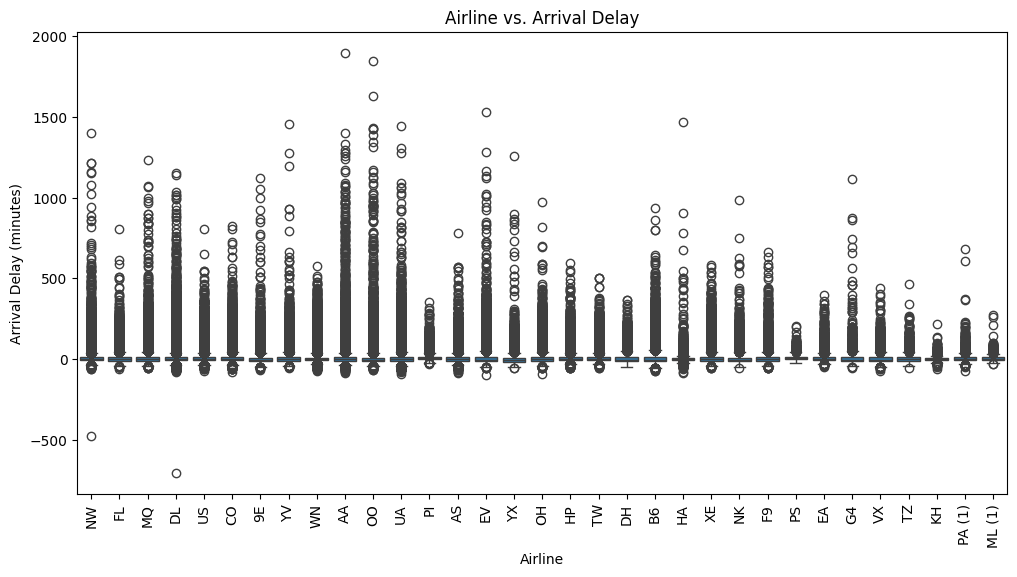

In [8]:
# Boxplot of different airlines and their average departure delays
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reporting_Airline', y='ArrDelay', data=df)
plt.title('Airline vs. Arrival Delay')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

This box plot displays the distribution of departure delays across different airlines. Its distribution of points reveals that most flights depart with minimal delays, as indicated by the concentration of data around zero. However, some airlines exhibit a wider spread of delays, suggesting inconsistent punctuality compared to those with more compact distributions. 

Extreme outliers, where delays exceed 1000 minutes, indicate occasional severe disruptions. Additionally, the presence of negative values suggests some flights depart earlier than scheduled.
 
While there are differences in performance across airlines, these variations are not overwhelmingly drastic. Since airlines with higher delays were included in the model, the results suggest a more nuanced view of the data. However, further analysis, such as statistical testing, would be necessary to confirm if these differences are significant and reflect true patterns or are due to other factors in the dataset.

---------------------------------------------------------------------------------------------------------------------

## **Line Plot Showing Average Monthly Departure Delay** 

X-axis: Month

Y-axis: Average Departure Delay (minutes)

The plot shows the average departure delay for each month, helping to identify any trends or patterns in delays throughout the year.

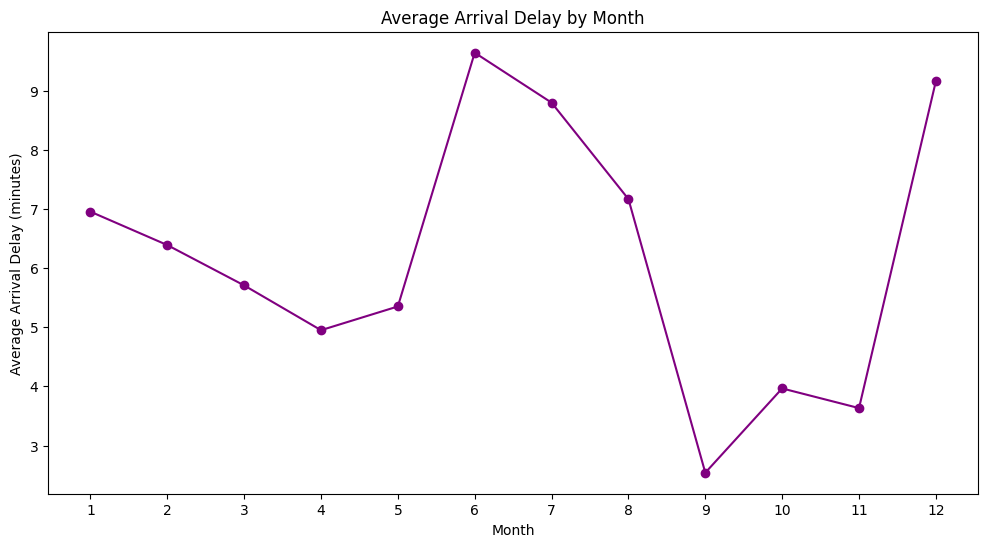

In [29]:
# Line plot for monthly delay trends (avg DepDelay)
monthly_avg_delay = df.groupby('Month')['ArrDelay'].mean()
plt.figure(figsize=(12, 6))
monthly_avg_delay.plot(kind='line', marker='o', color='purple')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(range(1, 13))
plt.show()

The line plot reveals that the highest average arrival delays occur in June, July, and December. These months correspond with peak travel periods, such as summer vacation and the holiday season, when flight demand tends to increase. 

The prolonged high delays in June and July gradually taper off towards August, with a sharp decline observed in September, coinciding with the start of the academic year. 

This pattern suggests that the increased number of flights during these busy periods may contribute to the elevated delays, likely due to factors such as higher traffic volumes, operational strain, and weather-related disruptions.

---------------------------------------------------------------------------------------------------------------------

## **Line Plot Showing Average Flight Delay by Year**

X-axis: Year

Y-axis: Average Departure Delay (minutes)


This line plot shows the trend of average departure delays over multiple years, allowing for an understanding of whether delays have increased or decreased over time.

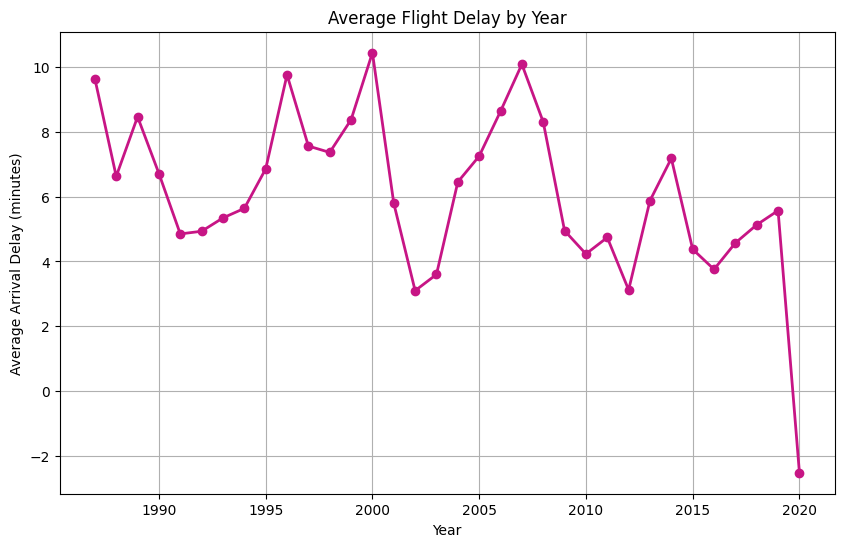

In [9]:
# Group data by Year and calculate the average Departure Delay per year
df['Year'] = pd.to_datetime(df['FlightDate']).dt.year  # Ensure the year column is in datetime format
avg_delay_per_year = df.groupby('Year')['ArrDelay'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    avg_delay_per_year.index, 
    avg_delay_per_year.values, 
    marker='o', 
    color='#C71585',  # MediumVioletRed (purplish-pink)
    linestyle='-', 
    linewidth=2
)
plt.title('Average Flight Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Arrival Delay (minutes)')
plt.grid(True)
plt.show()

The plot represents no steady increase or decrease of flight delays over the years, rather there are significant increases and decreases between some years. 

The sharp decrease in the average delay times after the year 2000 can be as a result of technological advancements which began commencement in these years in the aviation field and better airport/airline management. 

However, with these improvements, there still came a sharp increase in the delay times in the following years, possibly from the higher demand for flights as a result of flight booking procedures being made easier with the use of technology. 

As the years went by, airlines moved from in-person flight bookings to online flight bookings which would have significantly increased the customer base. 

Continuous upgrades in infrastructure and airport procedures would be contributing factors to the varying increase and decrease in average delay times between the years. 

Additionally, the sharp decrease in delay time between 2019-2020 aligns with the arisal of the COVID-19 pandemic at the time, when travelling was restricted and limited flights were made available to the public. Lockdowns from the pandemic would have significantly decrease the customer base as not many people were travelling at the time, hence the lower demand for flights yielding less delay times.  

---------------------------------------------------------------------------------------------------------------------

## **Scatter Plots Showing  Flight Distance vs Arrival Delay**

X-axis: Flight Distance (miles)

Y-axis: Arrival Delay (minutes) 

The scatter plots examine how flight distance correlates with arrival delays, helping identify if longer flights tend to have more delays.

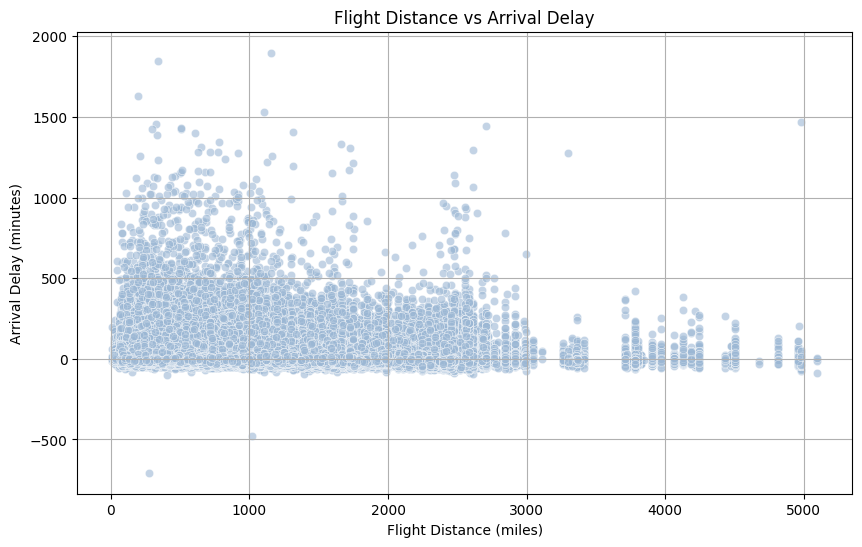

In [11]:
# Scatter plot for Distance vs Arrival Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='ArrDelay', color='#9BB7D4', alpha=0.6)  # Light blue-purple
plt.title('Flight Distance vs Arrival Delay')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

This scatter plots help us determine whether longer flight times result in longer arrival delays. From the distribution of the points on the plots, there is no steady increase in the arrival time as the flight distance increases. Instead, the majority of flights fall within the 0-3000 mile range with a varying increase in the departure/arrival time, (majority having delay time within the range 0-500 minutes). 

There are also a number of outliers in the dataset with long flight distances falling within this range, as well as fewer outliers with a long flight distance and long arrival delay. There are even some with long delays but were short in flight distance, indicating that flight distance may not be a direct factor contributing to flight delays. 

---------------------------------------------------------------------------------------------------------------------

## **Arrival Delay Outliers**

In [14]:
# Count total flights with positive arrival delay
num_delayed = (df['ArrDelay'] > 0).sum()

# Count flights with no delay or early arrival
num_ontime_or_early = (df['ArrDelay'] <= 0).sum()

# Total number of records
total_flights = len(df)

print(f"Total flights: {total_flights}")
print(f"Flights with arrival delay: {num_delayed}")
print(f"Flights on time or early: {num_ontime_or_early}")

Total flights: 2000000
Flights with arrival delay: 859554
Flights on time or early: 1099368


The dataset contains a total of 2,000,000 flights. 

Out of these, 859,554 flights experienced arrival delays, while 1,099,368 flights were either on time or arrived early. 

This indicates that around 43% of flights were delayed, with the remaining 57% arriving as scheduled or earlier than expected. 

This distribution provides valuable insights into the overall punctuality of the flights in the dataset and can help inform further analysis of delay patterns and factors contributing to late arrivals.

In [12]:
Q1 = df['ArrDelay'].quantile(0.25)
Q3 = df['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
arr_delay_outliers = df[(df['ArrDelay'] < lower_bound) | (df['ArrDelay'] > upper_bound)]

print(f"Number of Arrival Delay outliers: {len(arr_delay_outliers)}")

Number of Arrival Delay outliers: 160754


Out of the dataset, 160,754 flights were identified as outliers in terms of arrival delay. These outliers represent flights with unusually high delays compared to the rest of the dataset. 

Their presence highlights the variability in arrival times and suggests that while most flights may follow a relatively consistent delay pattern, a significant number experience extreme disruptions. 

Identifying and analyzing these outliers is important, as they can potentially skew overall averages and may point to specific operational issues or exceptional circumstances worth further investigation.

**Visualizing Arrival Delay Outliers**

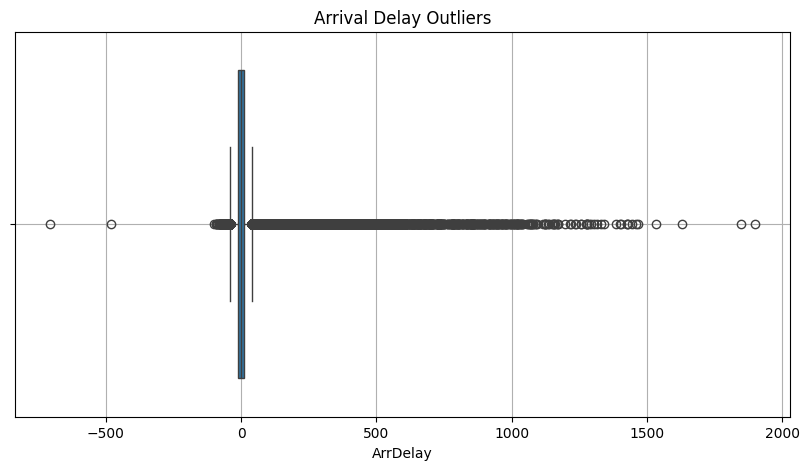

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ArrDelay'])
plt.title('Arrival Delay Outliers')
plt.grid(True)
plt.show()

---------------------------------------------------------------------------------------------------------------------

## **Flight Counts by Month**

X-axis: Month
Y-axis: Number of Flights

This bar plot displays the number of flights occurring in each month, based on the FlightDate data. Each bar represents a month's total flight count, allowing for a quick comparison of travel volume trends over the year. Higher flight volumes in certain months may correlate with seasonal travel demand and can influence delay patterns analyzed elsewhere in the project.

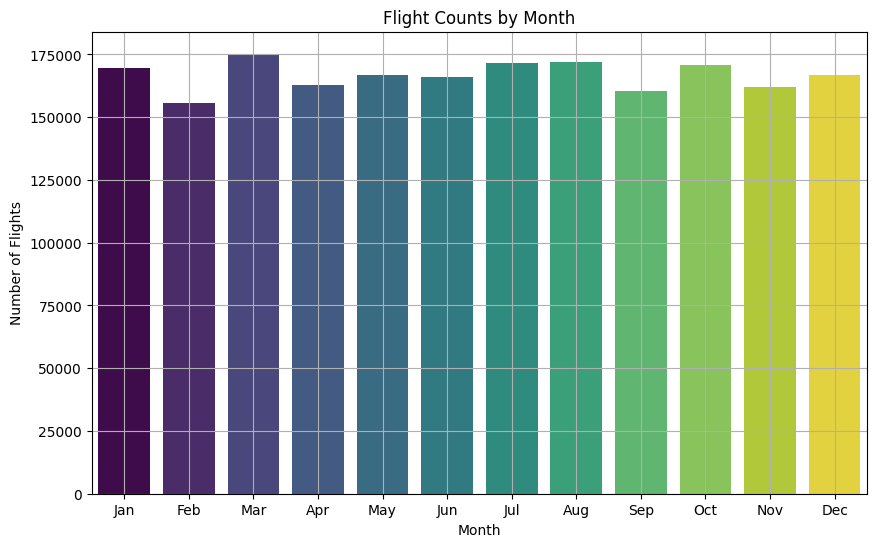

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the month from the FlightDate column
df['Month'] = pd.to_datetime(df['FlightDate']).dt.month

# Group by Month and count flights
monthly_flight_counts = df['Month'].value_counts().sort_index()

# Plotting flight counts by Month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_flight_counts.index, y=monthly_flight_counts.values, hue=monthly_flight_counts.index, palette='viridis', legend=False)
plt.title('Flight Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


The bar plot shows that all months experience a high number of flights, indicating that air travel demand stays strong throughout the year. 

This steady volume suggests that managing flight operations and potential delays is a year-round challenge rather than just a seasonal issue. For travelers—especially frequent ones like business professionals or those relying on air transport regularly—this highlights how delays can impact plans at any time. 

From a technology and innovation perspective, this insight reinforces the need for continuous improvements in scheduling systems, predictive analytics, and real-time delay management tools to support the aviation industry in maintaining efficiency regardless of the season.

---------------------------------------------------------------------------------------------------------------------

## **Correlation Heatmap of Flight-Related Features**

This heatmap shows how strongly flight-related variables like delays, air time, and distance are correlated. It helps identify patterns, such as the positive relationship between departure and arrival delays, which is useful for understanding delay behavior and building predictive models.

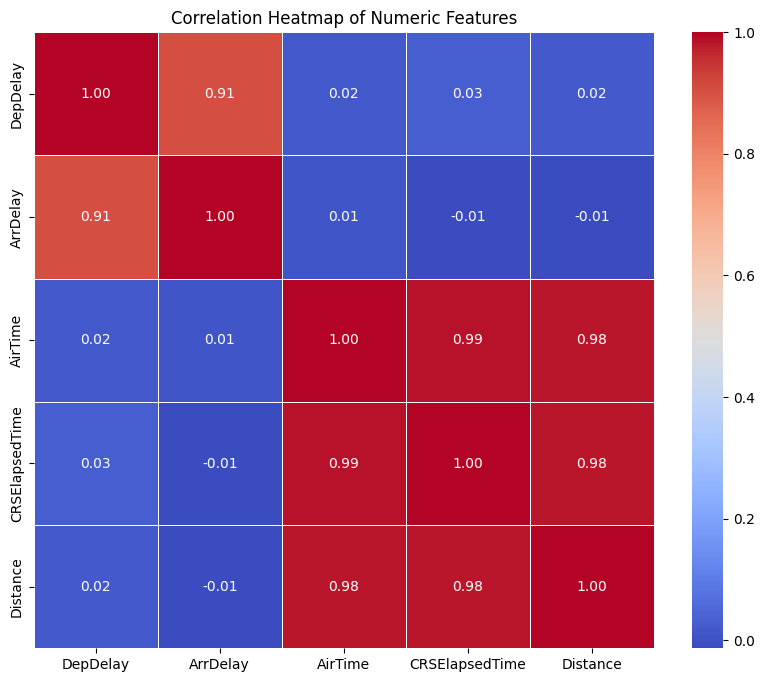

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features for correlation
numeric_features = ['DepDelay', 'ArrDelay','AirTime', 'CRSElapsedTime', 'Distance']

# Compute correlation matrix
correlation_matrix = df[numeric_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The correlation heatmap reveals several strong relationships between key flight variables.

There is a very high correlation between Distance and AirTime (0.98), as well as between Distance and CRSElapsedTime (0.98), which is expected since longer flights naturally take more time. 

Similarly, AirTime and CRSElapsedTime show a near-perfect correlation of 0.99, indicating that scheduled time closely reflects actual airtime.

Most relevant to this project is the strong positive correlation of 0.91 between DepDelay and ArrDelay, reinforcing the insight that delays at departure are closely tied to delays upon arrival.

The correlation insights are highly valuable for understanding how different flight attributes interact and for informing predictive modeling. For instance, the strong relationships between Distance, AirTime, and CRSElapsedTime confirm that flight duration metrics are consistent and can be reliably used together in models. 